In [ ]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Models Estimation

In [17]:
path = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/sponge_box_all-data/'
print(len(sorted(os.listdir(path))))
rnd_idx = np.array([2,16,26,36,46,51,61,64,78,86,104,108,133,139,152,163,169,180,184,189,131,200])
len(rnd_idx)

800


22

In [18]:
y = np.array(pd.read_csv(path+f'{rnd_idx[0]}_percep_force_sponge_box_data.csv'))
x = np.array(pd.read_csv(path+f'{rnd_idx[0]}_percep_pos_sponge_box_data.csv'))
l = len(y)
x.shape, y.shape

((894, 12), (894, 1))

In [19]:
for i in range(len(rnd_idx)-1):
    x1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]}_percep_pos_sponge_box_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]}_percep_force_sponge_box_data.csv'))

    x = np.concatenate([x,x1])
    y = np.concatenate([y,y1])
print(x.shape, y.shape)

(20118, 12) (20118, 1)


In [20]:
y_test = np.array(pd.read_csv(path+f'{rnd_idx[3]-2}_force_sponge_box_data.csv'))
x_test = np.array(pd.read_csv(path+f'{rnd_idx[3]-2}_pos_sponge_box_data.csv'))

x_test.shape, y_test.shape

((34483, 12), (34483, 1))

In [21]:
for i in range(len(rnd_idx)//2):
    x1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]-1}_pos_sponge_box_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]-1}_force_sponge_box_data.csv'))
    x_test = np.concatenate([x_test,x1])
    y_test = np.concatenate([y_test,y1])
print(x_test.shape, y_test.shape)

(413748, 12) (413748, 1)


In [ ]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x,y)
t2 = datetime.now()
y_pred = cat.predict(x_test)

In [23]:
print('RMSE:', mean_squared_error(y_pred, y_test)**0.5)
print(t2-t1)

RMSE: 0.17595194966402194
0:00:07.609594


In [33]:
error = []
for i in range(1,201):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = cat.predict(x1)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('results_catboost.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))

0.18135505214993877


In [26]:
print(np.std(np.array(error)))
max(error), min(error)

0.046030544901875546


(0.3990114196271547, 0.12030271219266024)

In [27]:
for i in range(5):
    val = sorted(error)[::-1][i]
    print(val, 'at', error.index(val)+1)


0.3990114196271547 at 196
0.3429869808188579 at 157
0.3165948552214021 at 126
0.3137082125668532 at 117
0.294076565667304 at 197


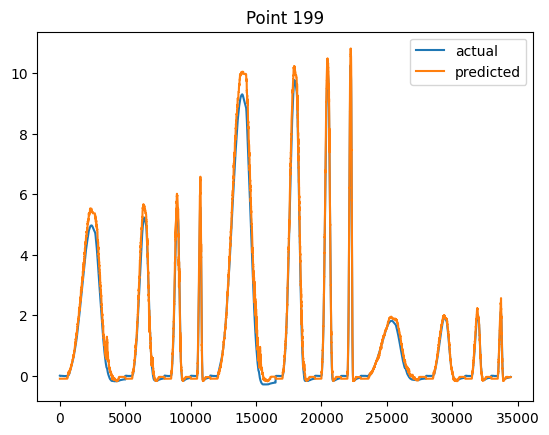

In [28]:
def graph(i):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = cat.predict(x1)
    plt.plot(range(len(y1)), y1, label = 'actual')
    plt.plot(range(len(y1)), y_pred, label = 'predicted')
    plt.legend()
    plt.title(f'Point {i}')
    plt.show()

graph(199)

# Random Forest

In [29]:
rf = RandomForestRegressor()
t1 = datetime.now()
rf.fit(x,y)
t2 = datetime.now()
y_pred = rf.predict(x_test)
print('RMSE:', mean_squared_error(y_pred, y_test)**0.5)
print(t2-t1)

RMSE: 0.21058201837041163
0:00:23.737761


In [31]:
error = []
for i in range(1,201):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = rf.predict(x1)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('results_RF.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))

0.1904757485332344


In [32]:
print(sum(error)/len(error))
print(np.std(np.array(error)))
max(error), min(error)

0.1904757485332344
0.0802998874444021


(0.5572840126485991, 0.10489224201782853)

# Clusterring

In [34]:
path2 = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/'
arr = np.array(pd.read_csv(path2+'x_y_sponge_box.csv', names = ['x','y']))
print(arr.shape)
arr[:5]

(200, 2)


array([[ -0.416,  16.941],
       [ -0.628,   2.808],
       [ -0.844,   5.401],
       [ -0.978, -10.853],
       [ -0.988,  14.376]])

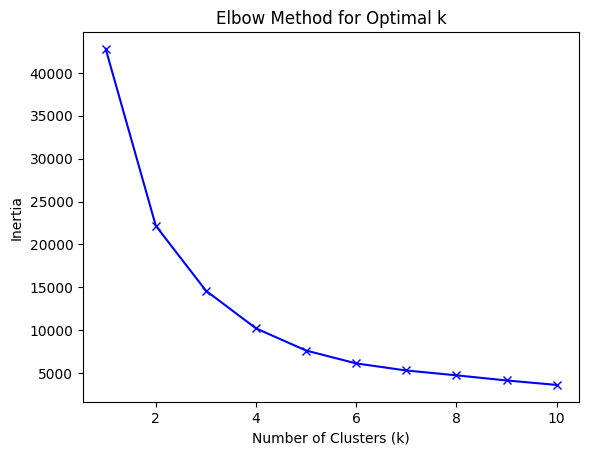

In [35]:
from sklearn.cluster import KMeans
k_values = range(1, 11)

# Perform k-means clustering for each k value
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(arr)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(arr)
kmeans.cluster_centers_

array([[  6.68723529, -14.22455882],
       [  3.82902439,  14.07331707],
       [-10.09895238, -10.7757619 ],
       [  5.46342857,  -0.10814286],
       [-10.40809756,   9.22636585]])

In [37]:
from collections import defaultdict
d = defaultdict(lambda: [])
for i in range(200):
    label = kmeans.predict([arr[i]])[0]
    d[label].append(i)

for i in range(5):
    print(d[i])

[3, 6, 103, 106, 111, 113, 114, 117, 118, 119, 122, 123, 128, 131, 133, 135, 139, 140, 143, 153, 159, 161, 162, 166, 168, 170, 173, 177, 179, 180, 186, 188, 191, 193]
[0, 4, 5, 8, 9, 57, 59, 60, 64, 65, 66, 104, 105, 110, 112, 115, 120, 127, 130, 136, 137, 141, 144, 145, 147, 148, 150, 152, 154, 157, 160, 165, 169, 171, 185, 187, 189, 190, 192, 196, 199]
[11, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 31, 35, 36, 37, 39, 42, 46, 47, 51, 52, 53, 55, 62, 63, 67, 68, 70, 73, 74, 76, 79, 81, 83, 86, 87, 88, 89, 90, 101]
[1, 2, 7, 10, 56, 58, 61, 107, 108, 109, 116, 121, 124, 125, 126, 129, 132, 134, 138, 142, 146, 149, 151, 155, 156, 158, 163, 164, 167, 172, 174, 175, 176, 178, 181, 182, 183, 184, 194, 195, 197, 198]
[12, 14, 18, 19, 28, 29, 30, 32, 33, 34, 38, 40, 41, 43, 44, 45, 48, 49, 50, 54, 69, 71, 72, 75, 77, 78, 80, 82, 84, 85, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102]


In [38]:
from scipy.linalg import norm

def dist(i):
    at = -1
    mini = 10
    for j in range(len(d[i])):
        dis = ((arr[d[i][j]][0]- kmeans.cluster_centers_[i][0])**2 + (arr[d[i][j]][1]- kmeans.cluster_centers_[i][1])**2)**0.5
        if dis <mini:
            mini = dis
            at = j
    print(f'{d[i][at]+1} is the master node of {i}th cluster')
    print(arr[d[i][at]], kmeans.cluster_centers_[i],'\n')
for i in range(5):
    dist(i)

174 is the master node of 0th cluster
[  5.549 -15.501] [  6.68723529 -14.22455882] 

149 is the master node of 1th cluster
[ 2.764 14.217] [ 3.82902439 14.07331707] 

102 is the master node of 2th cluster
[ -9.89  -10.324] [-10.09895238 -10.7757619 ] 

175 is the master node of 3th cluster
[ 5.707 -0.473] [ 5.46342857 -0.10814286] 

99 is the master node of 4th cluster
[-9.571  8.053] [-10.40809756   9.22636585] 



In [39]:
x1 = np.array(pd.read_csv(path+f'{174}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{174}_force_sponge_box_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[0])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total = error

0.1626184896550424
0.44150606934721326 0.030602253369759108


In [40]:
x1 = np.array(pd.read_csv(path+f'{149}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{149}_force_sponge_box_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[1])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.2794568109440327
0.8404381743289393 0.028164599531066932


In [41]:
x1 = np.array(pd.read_csv(path+f'{102}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{102}_force_sponge_box_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[2])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.2076449529200736
0.47186872395444873 0.03472275788999489


In [42]:
x1 = np.array(pd.read_csv(path+f'{175}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{175}_force_sponge_box_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[3])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total+= error

0.23869519377510043
0.5454094723589876 0.029340577656540245


In [43]:
x1 = np.array(pd.read_csv(path+f'{99}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{99}_force_sponge_box_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[4])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_sponge_box_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_sponge_box_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.10872364085773832
0.28207273777812225 0.02861425651359809


In [44]:
print('Mean:', np.mean(np.array(total)))
print('Std:', np.std(np.array(total)))

Mean: 0.20095356666670677
Std: 0.14130915000839817


In [45]:
max(total)

0.8404381743289393